In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris


In [4]:

# Charger les données Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target  # Ajouter les étiquettes

# Afficher les premières lignes
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
df.shape

(150, 5)

In [15]:
df.duplicated().sum()

np.int64(1)

In [19]:
df=df.drop_duplicates()
df.shape

(149, 5)

In [21]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: >

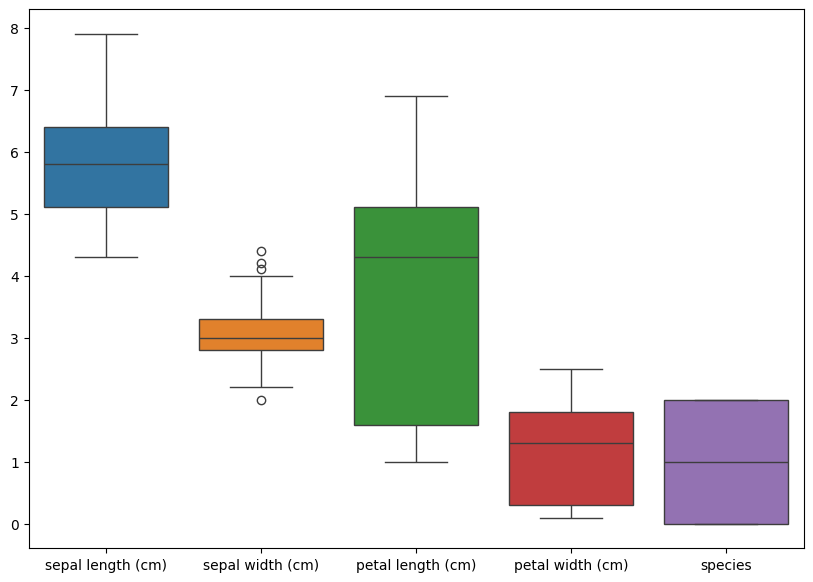

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(df)


In [36]:
# Calcul de l'IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Suppression des valeurs aberrantes
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Nombre d'échantillons avant nettoyage : {df.shape[0]}")
print(f"Nombre d'échantillons après nettoyage : {df_cleaned.shape[0]}")

Nombre d'échantillons avant nettoyage : 149
Nombre d'échantillons après nettoyage : 145


In [37]:
df=df_cleaned

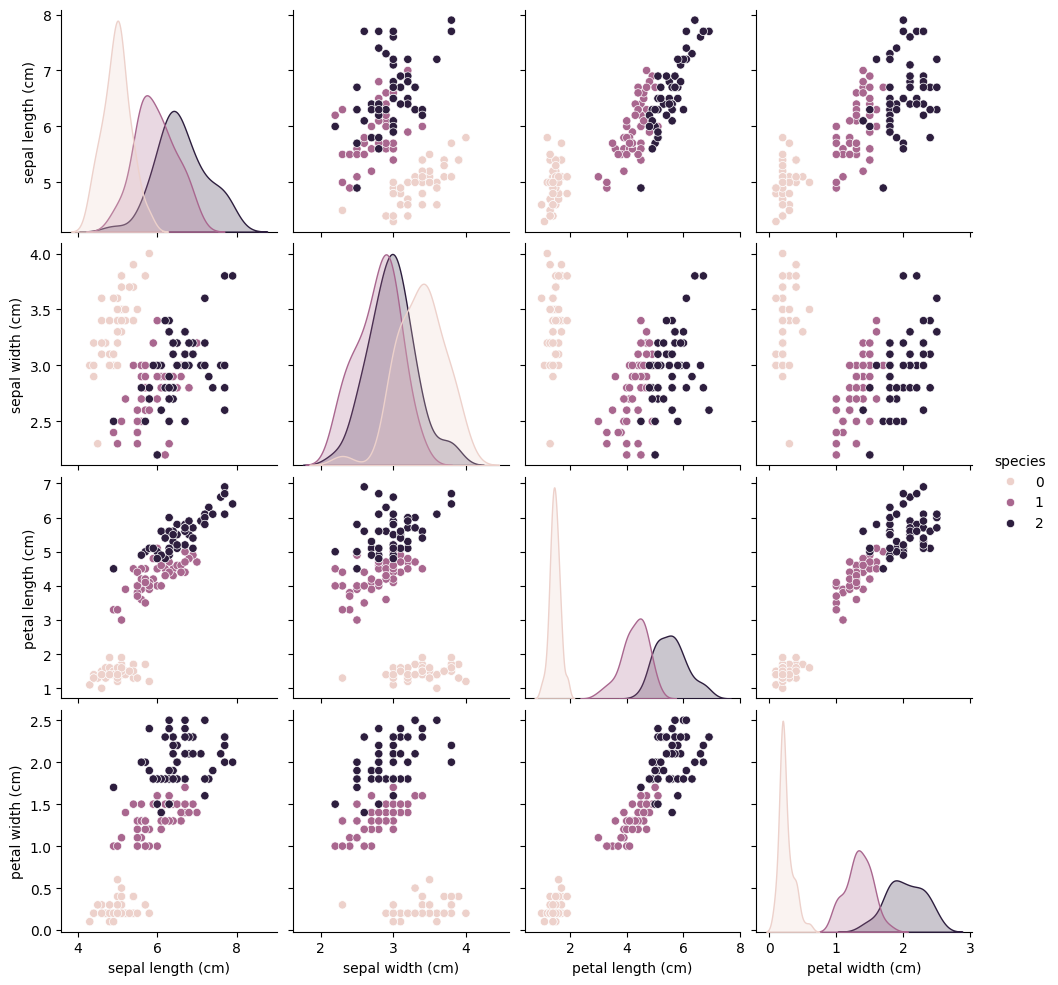

In [38]:
# Visualisation des relations entre caractéristiques
sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

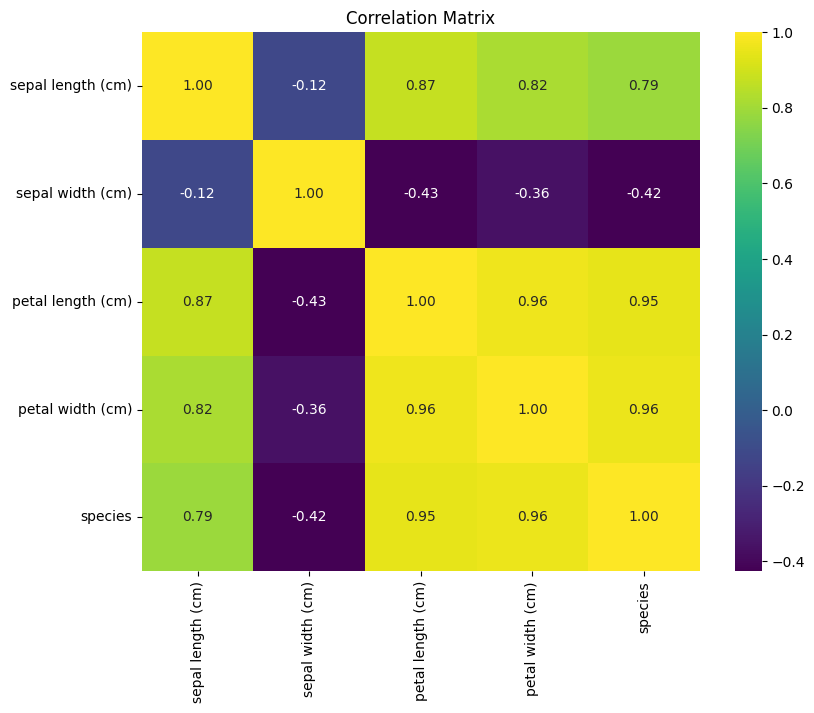

In [31]:
cm=df.corr()
plt.figure(figsize=(9,7))  
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Distribution des espèces')

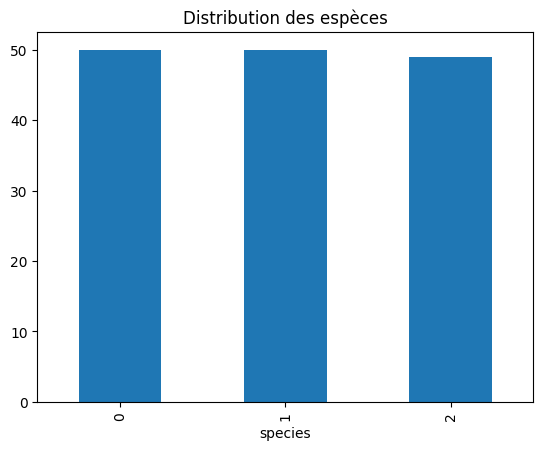

In [35]:
df['species'].value_counts().plot(kind='bar')
plt.title("Distribution des espèces")

In [7]:

# Séparer les caractéristiques (X) et les labels (y)
X = df.drop(columns=["species"])
y = df["species"]

In [8]:


# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encodage des labels en one-hot (car 3 classes)
y_encoded = to_categorical(y, num_classes=3)




In [9]:
# Division des données en ensemble d'entraînement (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [10]:
# Vérification des dimensions
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (120, 4)
y_train shape: (120, 3)


In [41]:
# Création du modèle
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),  # Couche cachée avec 10 neurones
    Dense(8, activation='relu'),  # Une deuxième couche cachée avec 8 neurones
    Dense(3, activation='softmax')  # Couche de sortie avec 3 neurones (classification 3 classes)
])

c:\Users\nabyp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
# Affichage du résumé du modèle
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - accuracy: 0.3580 - loss: 1.2619 - val_accuracy: 0.3000 - val_loss: 1.2711
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.2702 - loss: 1.2163 - val_accuracy: 0.2333 - val_loss: 1.1614
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.3556 - loss: 1.0800 - val_accuracy: 0.4333 - val_loss: 1.0676
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.5376 - loss: 0.9901 - val_accuracy: 0.5667 - val_loss: 0.9830
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - accuracy: 0.5984 - loss: 0.9385 - val_accuracy: 0.5000 - val_loss: 0.9102
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.5958 - loss: 0.8721 - val_accuracy: 0.5333 - val_loss: 0.8487
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - accuracy: 0.6370 - loss: 0.8108 - val_accuracy: 0.5333 - val_loss: 0.7933
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.6417 - loss: 0.7286 - val_acc

In [45]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0611
Test Accuracy: 1.0000
Test Loss: 0.0611


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


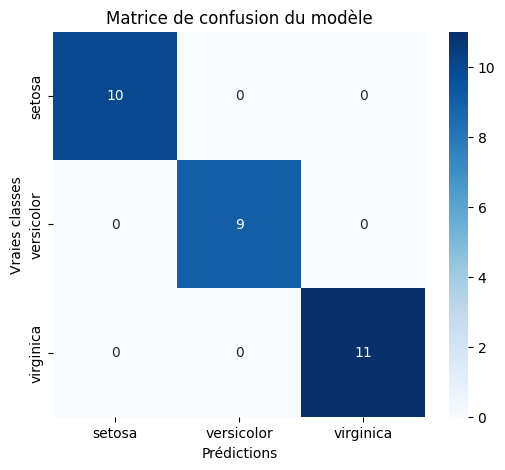

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convertir les probabilités en classes réelles
y_true = y_test.argmax(axis=1)

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de confusion du modèle")
plt.show()

In [47]:
model.save("iris_model.keras")

In [ ]:
# Chargement du modèle
#from tensorflow.keras.models import load_model
#model = load_model("iris_model.h5")